In [2]:
import pandas as pd

In [6]:
df1 = pd.read_csv(r"가공데이터_조건.csv")
df2 = pd.read_csv(r"가공데이터_변동성.csv")

In [8]:
df1

,Channel,Average_Harmonic_Mean,label,period,Angle
0,1분요리 뚝딱이형,1.705710,1,1,71.766547
1,1분요리 뚝딱이형,9.156482,1,2,71.766547
2,1분요리 뚝딱이형,12.821209,1,3,71.766547
3,1분요리 뚝딱이형,15.227568,1,4,71.766547
4,1분요리 뚝딱이형,17.356284,1,5,71.766547
...,...,...,...,...,...
1949,흔한일상,25.811534,0,57,4.420959
1950,흔한일상,25.799953,0,58,4.420959
1951,흔한일상,25.791324,0,59,4.420959
1952,흔한일상,25.782065,0,60,4.420959


In [9]:
# 필요없는 컬럼 제거
df1.drop(['Average_Harmonic_Mean'],axis=1,inplace=True)

In [10]:
df2

,Channel,Average_Harmonic_Mean,label,period,std
0,1분요리 뚝딱이형,1.705710,1,1,1.896808
1,1분요리 뚝딱이형,15.889167,1,2,1.896808
2,1분요리 뚝딱이형,22.179636,1,3,1.896808
3,1분요리 뚝딱이형,21.836163,1,4,1.896808
4,1분요리 뚝딱이형,23.712593,1,5,1.896808
...,...,...,...,...,...
1949,흔한일상,22.832007,0,57,5.697479
1950,흔한일상,23.109727,0,58,5.697479
1951,흔한일상,22.674245,0,59,5.697479
1952,흔한일상,22.063922,0,60,5.697479


In [11]:
# 필요없는 컬럼 제거
df2.drop(['Average_Harmonic_Mean'],axis=1,inplace=True)

In [12]:
# 데이터프레임 병합 (공통 컬럼인 'label'을 기준으로)
df = pd.merge(df1, df2, on=['Channel','label','period'])

In [13]:
df

,Channel,label,period,Angle,std
0,1분요리 뚝딱이형,1,1,71.766547,1.896808
1,1분요리 뚝딱이형,1,2,71.766547,1.896808
2,1분요리 뚝딱이형,1,3,71.766547,1.896808
3,1분요리 뚝딱이형,1,4,71.766547,1.896808
4,1분요리 뚝딱이형,1,5,71.766547,1.896808
...,...,...,...,...,...
1949,흔한일상,0,57,4.420959,5.697479
1950,흔한일상,0,58,4.420959,5.697479
1951,흔한일상,0,59,4.420959,5.697479
1952,흔한일상,0,60,4.420959,5.697479


In [14]:
import matplotlib.pyplot as plt

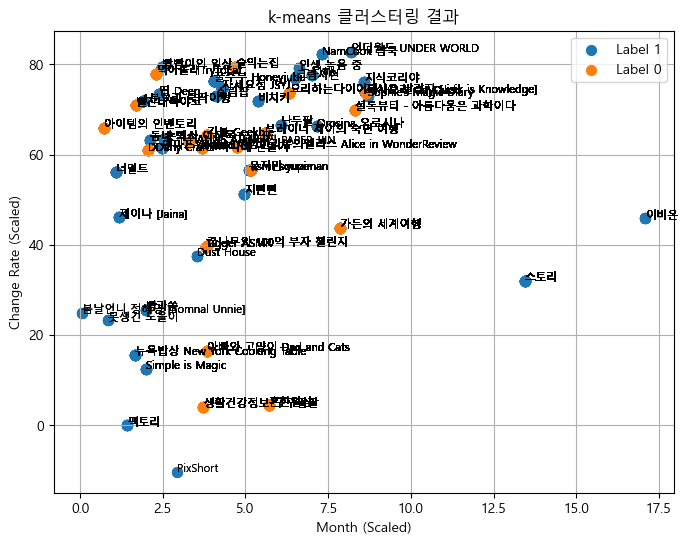

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 윈도우의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(8, 6))

# label에 따라 데이터 포인트 그리기
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['std'], subset['Angle'], label=f'Label {label}', s=50)
    
    # 각 점에 이름 표시 (글씨 크기 작게 설정)
    for i in range(len(subset)):
        plt.annotate(subset['Channel'].iloc[i], (subset['std'].iloc[i], subset['Angle'].iloc[i]), fontsize=8)

warnings.filterwarnings('ignore')

# 그래프 제목 및 축 레이블 설정
plt.title('k-means 클러스터링 결과')
plt.xlabel('Month (Scaled)')
plt.ylabel('Change Rate (Scaled)')

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 보이기
plt.show()


## 데이터에 따른 k-mean 모델 적용

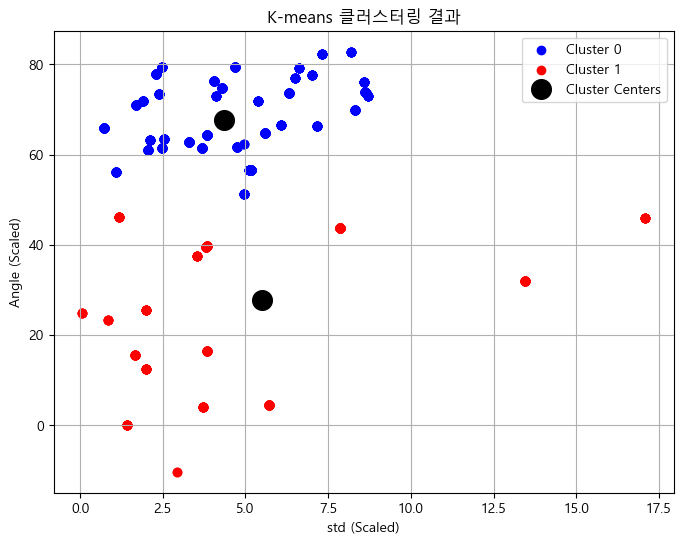

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings


# 예시 데이터 생성 (데이터프레임 형태)
warnings.filterwarnings('ignore')


# K-means 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(df[['std', 'Angle']])  # 'Month'와 'Average_Comments' 열만 사용하여 클러스터링

# 클러스터링 결과를 데이터프레임에 추가
df['Cluster'] = clusters

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))

# 클러스터 0과 1로 나누어 데이터 포인트 그리기
plt.scatter(df[df['Cluster'] == 0]['std'], df[df['Cluster'] == 0]['Angle'], c='blue', label='Cluster 0')
plt.scatter(df[df['Cluster'] == 1]['std'], df[df['Cluster'] == 1]['Angle'], c='red', label='Cluster 1')

# 클러스터 중심 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='black', s=200, label='Cluster Centers')

plt.title('K-means 클러스터링 결과')
plt.xlabel('std (Scaled)')
plt.ylabel('Angle (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
